In [1]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# functions : weights, biases, activation function, layers, outputs, loss function and fit

In [2]:
def make_weights(lenth_input):
    w = []
    for i in range(lenth_input):
        w.append((random.randint(1, 10))/10)
    return w

def make_bayeses(lenth_input):
    b=[]
    for i in range(lenth_input):
        b.append((random.randint(1, 10))/10)
    return b

def make_bayese(lenth_input):
    b=(random.randint(1, 10))/10
    return b

def normal(x):
    return (x - x.min()) / (x.max() - x.min())

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def layer(o, w, b):
    somme = 0.0
    for i in range(lenth_input):
        somme = somme + (o[i]*w[i])+b
    return somme

def layer1(x, w1, b1):
    o=[]
    s=0
    for i in range(4):
        s+=x[i]*w1[i]
    for j in range(4):
        o.append(sigmoid(s+b1[j]))
    return o

def g(x):
    if x>=0.75:
        return 1
    else:
        return 0
    
def loss(y, x):
    losses = 0
    n=len(x)
    for i,j in zip(x,y):
        losses+=abs(j-output(layer1(i, w1, b1),w,b))
    return (1/n)*losses


def fit(x, y, w1, b1, w, b, learning_rate=0.06, epochs=5):
    for epoch in range(epochs):
        
        for i in range(lenth_data):
            x = np.array(x)
            y = np.array(y)
            xi = x[i]
            yi = y[i]
                
            s = layer(xi, w, b)
            prediction = sigmoid(s)
            error = yi - prediction
            w = w + learning_rate * error * sigmoid_derivative(prediction) * xi
            b = b + learning_rate * error * sigmoid_derivative(prediction)
            
            prediction = output(layer1(xi, w1, b1),w,b)
            error = yi - prediction
            w1 = w1 + learning_rate * error * sigmoid_derivative(prediction) * xi
            b1 = b1 + learning_rate * error * sigmoid_derivative(prediction)

    return w1,b1,w, b

def output(o, w, b):
    return sigmoid(layer(o, w, b))

def output1(inputs, w1, b1):
    return sigmoid(layer1(inputs, w1, b1))

def classe(x):
    return g(output(layer1(x, w1, b1),w,b))    



# MAKE DATA

In [3]:
def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

x=[]
y=[]

for i in range(1000):
    r1= random.randint(0,1)
    r2= random.randint(0,1)
    r3= random.randint(0,1)
    r4= random.randint(0,1)
    x.append([r1,r2,r3,r4])

x=unique(x)

for i in x:
    s=0
    for j in range(len(i)):
        s+=i[j]
    if s>=2:
        y.append(1)
    elif s>=0 and s<2:
        y.append(0)
    else:
        y.append(-1)
for i,j in zip(x,y):
    print(i,"--->",j)

[0, 0, 0, 1] ---> 0
[1, 0, 1, 0] ---> 1
[0, 1, 0, 1] ---> 1
[1, 1, 1, 1] ---> 1
[1, 1, 1, 0] ---> 1
[0, 0, 1, 0] ---> 0
[1, 0, 0, 0] ---> 0
[0, 0, 1, 1] ---> 1
[1, 1, 0, 0] ---> 1
[0, 1, 1, 1] ---> 1
[1, 0, 1, 1] ---> 1
[0, 1, 0, 0] ---> 0
[0, 1, 1, 0] ---> 1
[0, 0, 0, 0] ---> 0
[1, 0, 0, 1] ---> 1
[1, 1, 0, 1] ---> 1


In [4]:
lenth_data = len(x)
lenth_input = len(x[0])
print(lenth_input, lenth_data)
x=normal(np.array(x))
x

4 16


array([[0., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 1.],
       [1., 1., 0., 0.],
       [0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [0., 1., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 1., 0., 1.]])

In [5]:
len(x),len(y)

(16, 16)

# data destrubition 

In [6]:
one,zero,mines=0,0,0
for i in y:
    if i ==1:
        one+=1
    elif i==0:
        zero+=1
    else:
        mines+=1
print("one :",one,",zero :",zero,",mines :",mines)

one : 11 ,zero : 5 ,mines : 0


# making weights and biases

In [7]:
w1 = make_weights(lenth_input)
b1 = make_bayeses(lenth_input)
w = make_weights(lenth_input)
b = make_bayese(lenth_input)

print("w1:",w1)
print("w:",w)
print("b1",b1)
print("b",b)
print("loss",loss(y,x))


w1: [0.1, 0.1, 0.6, 1.0]
w: [1.0, 0.4, 0.6, 0.8]
b1 [0.7, 0.9, 0.6, 1.0]
b 0.1
loss 0.32786677715720797


# Training

In [8]:
presision = 60
loses=[]
while loss(y,x)>=(1/presision):
    w1,b1,w, b = fit(x, y, w1, b1, w, b, learning_rate=0.06, epochs=50)
    loses.append(loss(y,x))
    print("loss",loss(y,x))

loss 0.3379795005091819
loss 0.2923347565006036
loss 0.23819963627528698
loss 0.1965406294143724
loss 0.16548785691962503
loss 0.14183145615447992
loss 0.12338243989579849
loss 0.10870122572912723
loss 0.09681333187433941
loss 0.0870396657904064
loss 0.07889539066776721
loss 0.07202716620163524
loss 0.06617279003513829
loss 0.061134508203663715
loss 0.056760959049796084
loss 0.052934717544908624
loss 0.04956355257373858
loss 0.046574192583580136
loss 0.04390781461682266
loss 0.04151673583643231
loss 0.039361956202388866
loss 0.0374113117239051
loss 0.03563807123078386
loss 0.03401985912298862
loss 0.03253782036704684
loss 0.03117596739293912
loss 0.02992066491801713
loss 0.02876022032072162
loss 0.027684555490073686
loss 0.026684942083977446
loss 0.025753786518068703
loss 0.02488445424309597
loss 0.02407112527641501
loss 0.02330867475935374
loss 0.022592573678014732
loss 0.021918805925763868
loss 0.02128379868431665
loss 0.020684363717493416
loss 0.02011764765173587
loss 0.019581089693

# predict

In [12]:
classe([0,1,0,0]), classe([1,0,1,0]), classe([0,0,0,0]), classe([1,1,1,1]) #>=2

(0, 1, 0, 1)

# Model Evaluation

<AxesSubplot:>

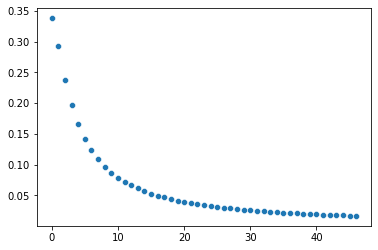

In [13]:
k = [x for x in range(len(loses))]
sns.scatterplot(x=k, y=loses )
#sns.regplot(x=k, y=loses)

# the final weights, biases and loss

In [14]:
print("w1:",w1)
print("b1:",b1)
print()
print("w:",w)
print("b:",b)
print()
print("loss:",loss(y,x))

w1: [1.83734758 1.83718216 1.83728103 1.83698186]
b1: [-3.47127535 -3.27127535 -3.57127535 -3.17127535]

w: [4.53990617 4.53961373 4.53984572 4.53951652]
b: -1.6664740370877826

loss: 0.016501400335711906
